## Problem Set 7: Analytical Chemistry II

<figure class="image">
    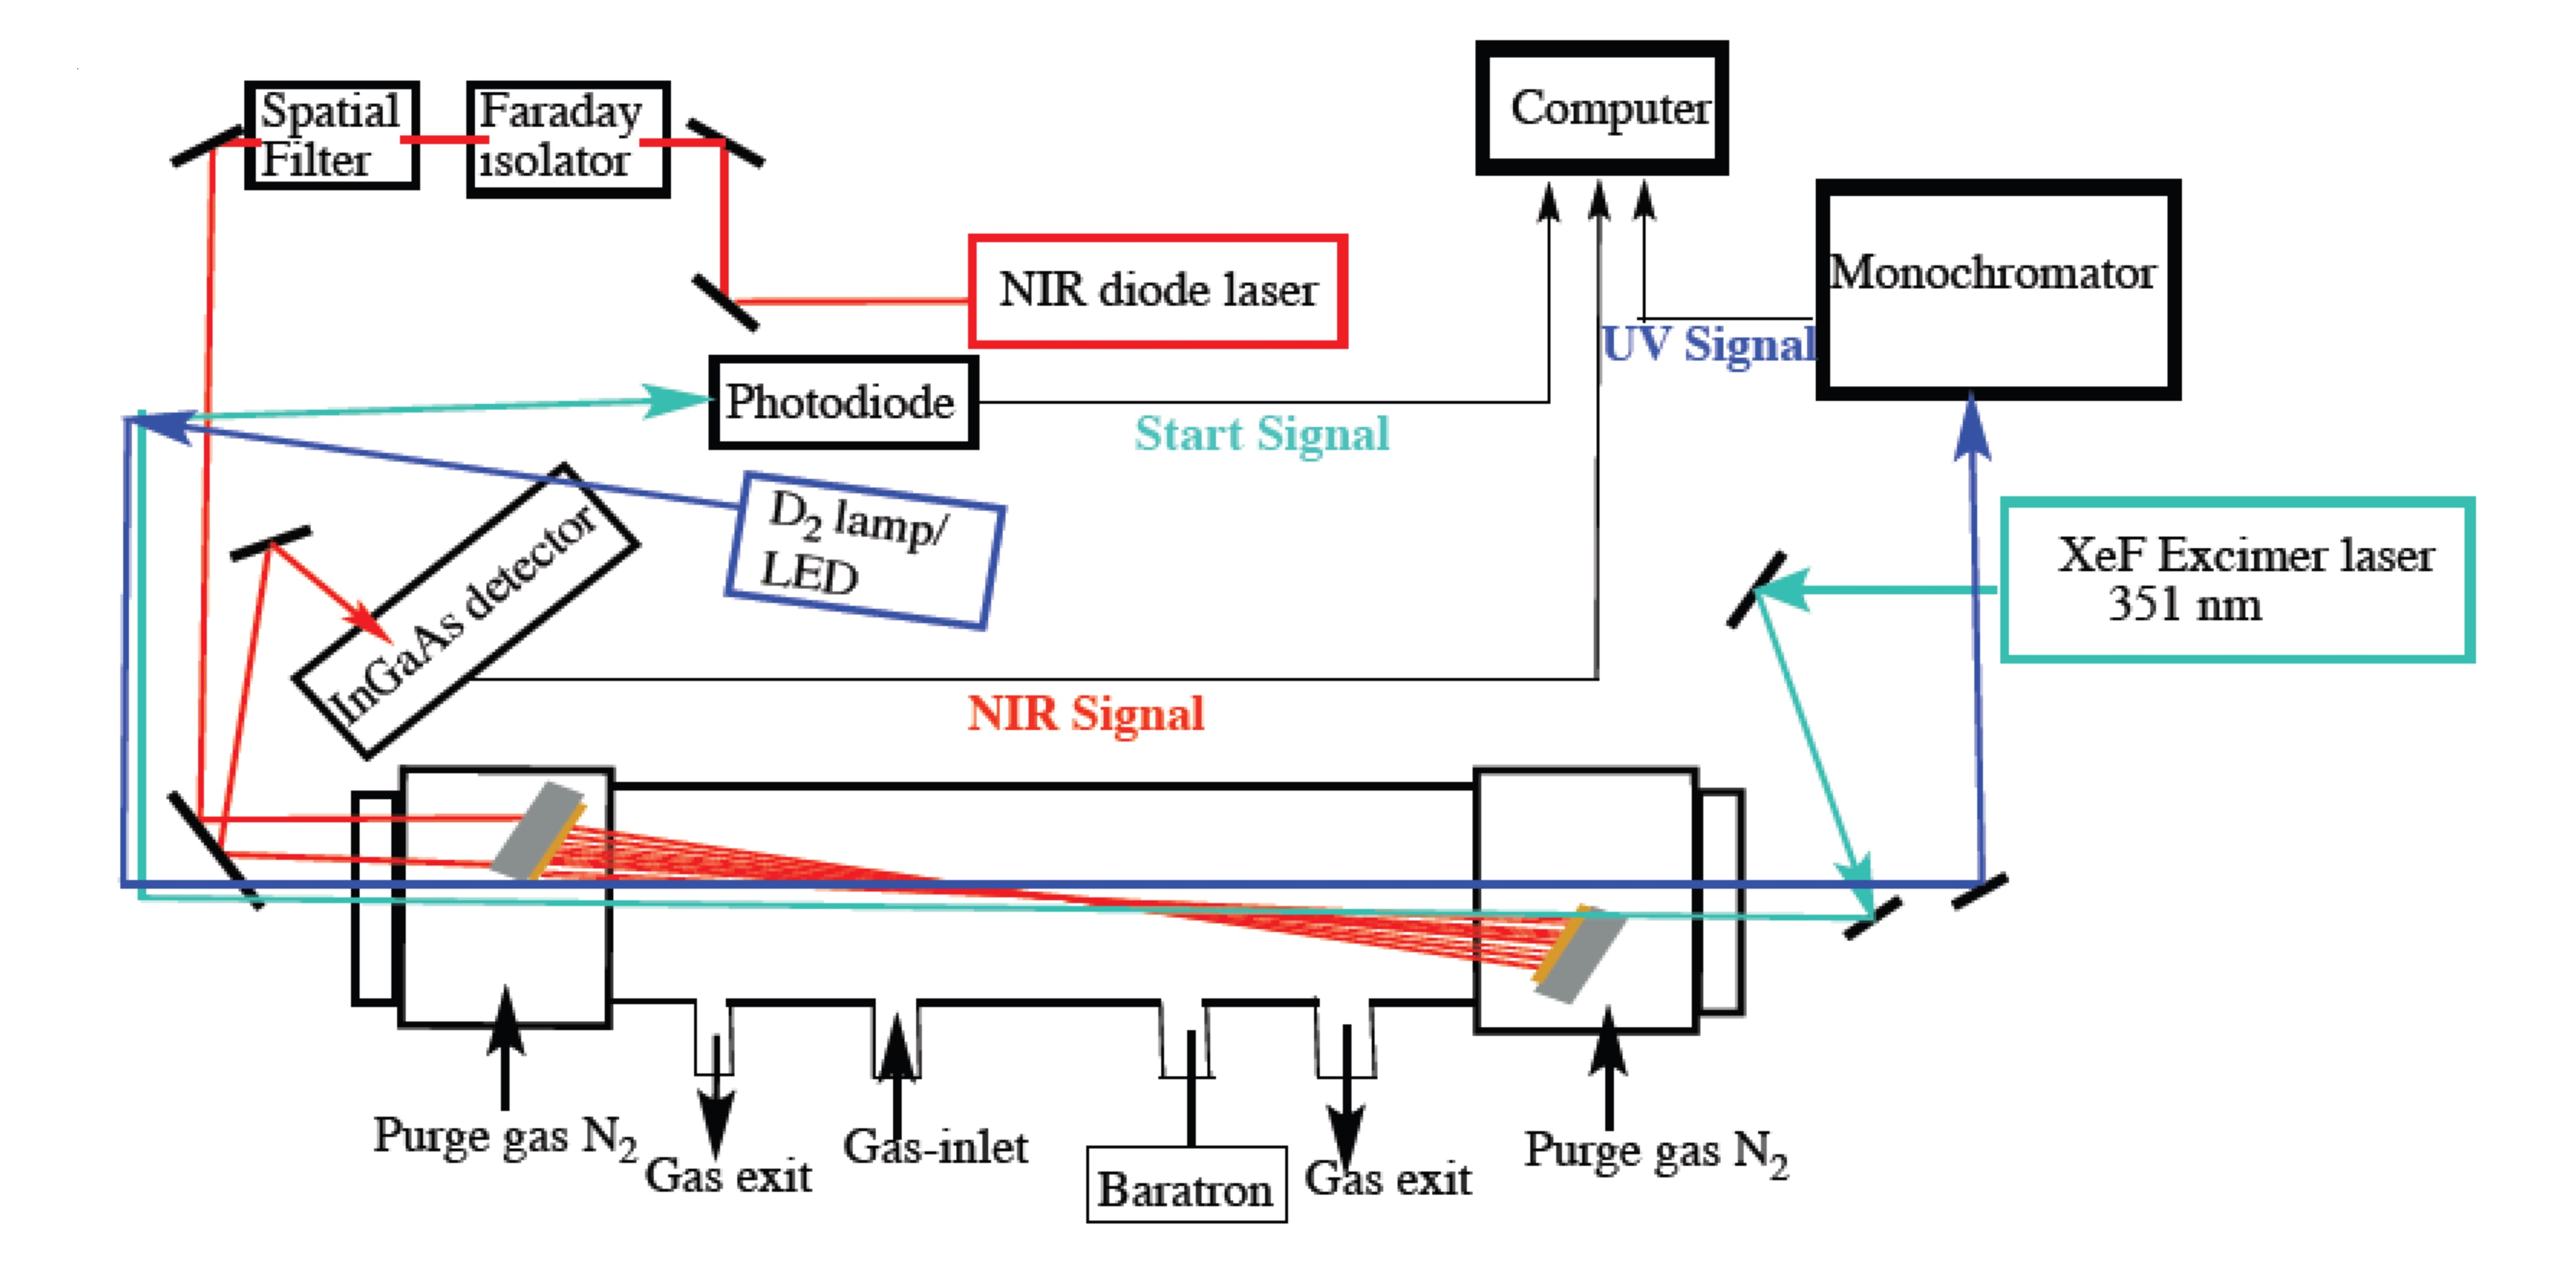
    <figcaption>Figure 1: Infrared kinetic spectroscopy instrument</figcaption>
</figure>

Above is the Infrared Kinetic Spectroscopy instrument at NASA Jet Propulsion Laboratory for measuring reactions of the atmospheric oxidant, the hydroperoxy radical (HO$_2$). This instrument was used to determine the temperature dependence of the self reaction of HO$_2$:

HO$_2$ + HO$_2 \rightarrow$ H$_2$O$_2$

This instrument measured HO$_2$ in both the IR at 6638.2 cm$^{-1}$ and in the UV at 220 nm. Today we will be looking at data from the UV. Begin by loading the data below.

In [1]:
##loads necessary package

import pandas as pd

#imports the data and reads the first 5 rows
HO2_data = pd.read_csv("data/HO2_UV_self.csv", error_bad_lines=False)
HO2_data[0:5]

,tsec,I_UV
0,-0.0050,-175.737786
1,-0.0049,-175.923499
2,-0.0048,-175.626245
3,-0.0047,-175.789591
4,-0.0046,-176.204279


**Question 1**: Plot a time series of the data below

Text(0.5, 0, 'time (s)')

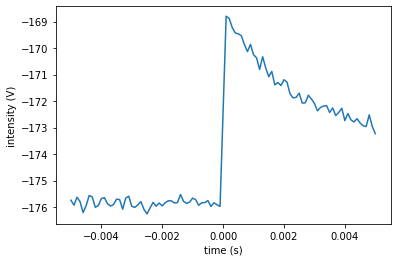

In [2]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(num=None, facecolor='w', edgecolor='k')

# add plots to the axis using the timestamp variables as the 'x' and NO2 values for the 'y'
ax.plot(HO2_data['tsec'],HO2_data['I_UV'], label = 'Voltage')

plt.ylabel('intensity (V)')
plt.xlabel('time (s)')

You will notive that the UV signal is flat before time zero, rises sharply at t = 0, and decreases slowly following t = 0. Before time zero the chemistry has yet to be initiated and the precursor gases CH$_3$OH, Cl$_2$, and O$_2$ are added to the flow tube reaction chamber. At t = 0 a powerful excimer laser flashes a short pulse of light at 351 nm to initiate the following very rapid reactions. 

Cl$_2$ + h$\nu \rightarrow 2$Cl

Cl + CH$_3$OH $\rightarrow$ HCl + CH$_2$OH

CH$_2$OH + O$_2 \rightarrow$ HO$_2$ + HCHO

This fast chemistry causes the sharp rise in the HO$_2$ UV signal to increase. All other reactions products are stable, so HO$_2$ after t = 0 begins to react with itself, causing the signal to decrease.

**Question 2** The UV signal, in units of voltage can be converted to HO$_2$ concentration using the Beer-Lambert law. :

$\frac{I_0}{I} = \exp{(\sigma [C] l)}$

$\sigma$: molar absorption coefficient, also known as an absorption cross section

$[C]$:  the concentration of the absorbing species

$l$: light path length trhough sample

$I_0$: intensity of light before passing through sample 

$I$: intensity of light after passing through sample

**Question 2.1** To do this you will first determine $I_0$ from the average of the signal before the excimer laser pulse (t<0). Create a subset of the data in this time range and find the average of the UV signal. 

In [4]:
HO2_data_init = HO2_data[HO2_data['tsec'] < 0]

In [5]:
I_0 = HO2_data_init['I_UV'].mean()
I_0

-175.84321522399998

**Question 2.2** The absorption cross section of HO$_2$ is 3.41E-18 cm$^2$ and the length of the flow tube is 153.9 cm. Create a new column in HO2_data of HO$_2$ concentrations in units of molecules cm$^{-3}$.

In [6]:
import math

HO2_data['HO2'] = None

for i in np.arange(len(HO2_data['I_UV'])):
    HO2_data.at[i,'HO2'] = math.log(I_0/HO2_data['I_UV'][i])/(3.41E-18*153.9)
    
HO2_data

,tsec,I_UV,HO2
0,-0.0050,-175.737786,1.14281e+12
1,-0.0049,-175.923499,-8.6978e+11
2,-0.0048,-175.626245,2.3526e+12
3,-0.0047,-175.789591,5.81173e+11
4,-0.0046,-176.204279,-3.90859e+12
...,...,...,...
95,0.0046,-172.927086,3.1865e+13
96,0.0047,-172.958281,3.15213e+13
97,0.0048,-172.519950,3.63566e+13
98,0.0049,-172.952979,3.15797e+13


**Question 2.3** Creat a time series plot of HO$_2$ concentrations

Text(0.5, 0, 'time (s)')

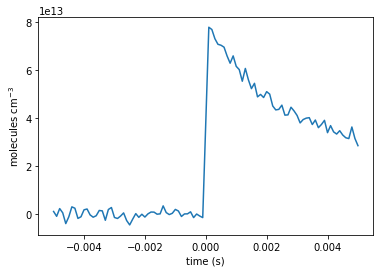

In [7]:

fig, ax = plt.subplots(num=None, facecolor='w', edgecolor='k')

# add plots to the axis using the timestamp variables as the 'x' and NO2 values for the 'y'
ax.plot(HO2_data['tsec'],HO2_data['HO2'])

plt.ylabel('molecules cm$^{-3}$')
plt.xlabel('time (s)')

**Question 3** The rate of the HO$_2$ self reaction can be written as:

$\frac{1}{2}\frac{ 𝑑[𝐻𝑂_2 ])}{𝑑𝑡}=−𝑘 [𝐻𝑂_2 ]^2$

Where $k$ is the rate constant for the HO$_2$ self-reaction. Examine this equation and prove to yourself that this can be solved for the HO$_2$ concentration at any time $t$ according to:

$\frac{1}{[𝐻𝑂_2 ]} =\frac{1}{[𝐻𝑂_2 ]_0} +2𝑘𝑡$

**Question 3.1** You will now use the data to calculate the rate constant $k$. First, create a subset of the data after $t = 0$


In [8]:
## SUBSET OF DATA AFTER t =0
HO2_data_final = HO2_data[HO2_data['tsec'] > 0]

**Question 3.2** Below is code for creating and creating a scatter plot of two arrays--times, consisting of times follow t = 0 in units of seconds, and inv_HO2, consisting of data equal to 1/\[HO$_2$\]. 

Text(0, 0.5, 'cm$^{3}$ molecules$^{-1}$')

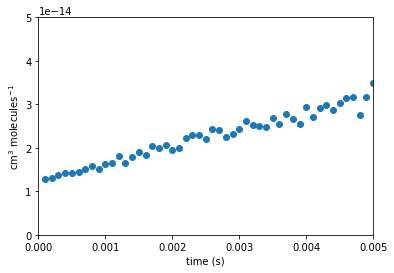

In [9]:

# add plots to the axis using the timestamp variables as the 'x' and NO2 values for the 'y'
times = np.array(HO2_data_final['tsec'].values, dtype = float)
inv_HO2 = np.array(1/HO2_data_final['HO2'].values, dtype = float)


#code for plotting data
fig, ax = plt.subplots(num=None, facecolor='w', edgecolor='k')
ax.scatter(times,inv_HO2)

plt.xlim(0,0.005)
plt.ylim(0,0.5e-13)
plt.xlabel('time (s)')
plt.ylabel('cm$^{3}$ molecules$^{-1}$')



**Question 3.4** You will notice that this scatter plot looks pretty linear. Examine the equations above Question 3.1 to prove to yourself that this makes sense. What should the slope and intercept be equal to?

**Question 3.5** Add a trend line to the scatter plot above and calculate the covariance matrix. *Hint: it may be helpful to look back at activity 6*

[3.91262265e-12 1.25334788e-14]


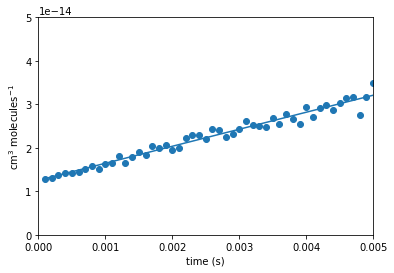

In [10]:
fig, ax = plt.subplots(num=None, facecolor='w', edgecolor='k')

# add plots to the axis using the timestamp variables as the 'x' and NO2 values for the 'y'
ax.scatter(times,inv_HO2)

plt.xlim(0,0.005)
plt.ylim(0,0.5e-13)
plt.xlabel('time (s)')
plt.ylabel('cm$^{3}$ molecules$^{-1}$')


line, cov = np.polyfit(times, inv_HO2, 1, cov=True)
# add the lines of best fit to the scatter plot
ax.plot(times, line[1] + [sec * line[0] for sec in times], '-')
print(line)

**Question 3.6** Calculate the rate constant for the HO$_2$ self reaction and the standard error in the rate constant. 

In [11]:
##CALCULATE k AND ITS STANDARD DEVIATION

k = line[0]/2

sek = np.sqrt(cov[0][0])/2

print(k, sek)


1.9563113265362724e-12 5.3676715857703644e-14


**Question 3.7** The code you wrote above assumes the error in the rate constant comes from the error in the fit. Does this seem like a good way to estimate the error of this quantity? What information is included in this calculation? What information is left out? *Hint: think about the data before t = 0*

**Question 3.7** Below is code to determine the t-value at 95% confidence. Use this to calculate the 95\% confidence interval.

In [12]:
from scipy import stats


#calculates the test-statistic for the desired confidence level
confidence = 0.95
df = len(inv_HO2)-2
t_val = stats.t.ppf((1 + confidence) / 2., df)


##student code here

CI_95 = t_val*sek
print(CI_95)

1.0792427042146476e-13


**Question 5** The product of the HO$_2$ self reaction is H$_2$O$_2$ which also absorbs at 220 nm with a cross section of $\sigma_{H_2O_2}$ = 2.58e-19 cm$^2$. How much absorbance due to H$_2$O$_2$ would you expect at 0.005 s? *Hint: for every 2 molecules of HO$_2$ consumed, one molecule of H$_2$O$_2$ is produced.* How would you expect this interference to affect your calculation of the self reaction rate constant?

In [ ]:
#Calculation here